In [1]:
data_file_watermelon_3a = "watermelon_3a.csv"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(data_file_watermelon_3a, header=None, )
df.columns = ['id', 'density', 'sugar_content', 'label']
df.set_index(['id'])
X = df[['density', 'sugar_content']].values
y = df['label'].values


Kernel: linear, Prediction: [0]
Kernel: rbf, Prediction: [0]


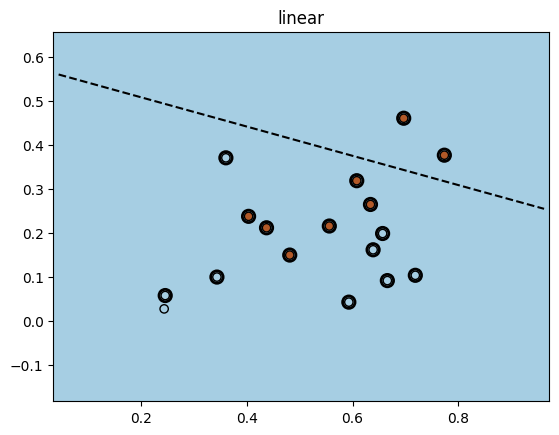

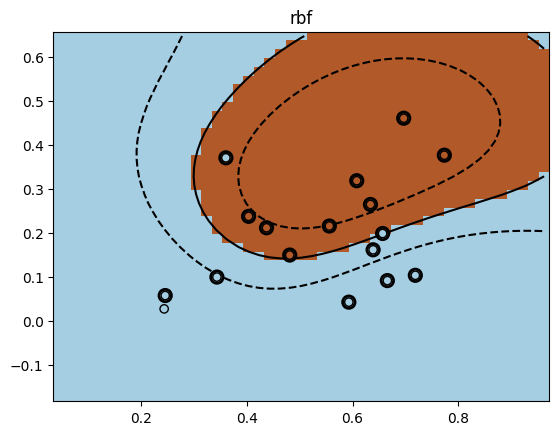

In [5]:
from sklearn import svm 

# 定义测试样本
X_test = [[0.719, 0.103]]


for fig_num, kernel in enumerate(('linear', 'rbf')): 
    # 构建SVM模型并训练
    svc = svm.SVC(kernel=kernel)
    svc.fit(X, y)
    
    # 预测测试样本
    y_pred = svc.predict(X_test)
    print(f"Kernel: {kernel}, Prediction: {y_pred}")
    
    # 获取支持向量
    sv = svc.support_vectors_
    
    ##### draw decision zone
    plt.figure(fig_num)
    plt.clf()
    
    # 绘制数据点并标出支持向量
    plt.scatter(X[:,0], X[:,1], edgecolors='k', c=y, cmap=plt.cm.Paired, zorder=10)
    plt.scatter(sv[:,0], sv[:,1], edgecolors='k', facecolors='none', s=80, linewidths=2, zorder=10)
    
    # 绘制决策边界
    x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
    y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
    XX, YY = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = svc.decision_function(np.c_[XX.ravel(), YY.ravel()]) 
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z>0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
    
    plt.title(kernel)
    plt.axis('tight')

plt.show()